In [2]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import shutil
import random

In [3]:
original_dataset_dir = "Dataset"
train_dir = os.path.join(original_dataset_dir, "train")
test_dir = os.path.join(original_dataset_dir, "test")

In [5]:
for category in ["with_mask", "without_mask"]:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

In [6]:
def split_data(category, train_ratio=0.8):
    src_folder = os.path.join(original_dataset_dir, category)
    images = os.listdir(src_folder)
    random.shuffle(images)

    split_index = int(len(images) * train_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    for img in train_images:
        shutil.move(os.path.join(src_folder, img), os.path.join(train_dir, category, img))
    for img in test_images:
        shutil.move(os.path.join(src_folder, img), os.path.join(test_dir, category, img))

In [7]:
split_data("with_mask")
split_data("without_mask")
print("Datasets split completed")

Datasets split completed


In [8]:
image_size = 128
batch_size = 32

In [9]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [10]:
train_data = datagen.flow_from_directory("Dataset\\train", target_size=(image_size, image_size),batch_size=batch_size, class_mode='binary')
val_data = datagen.flow_from_directory("Dataset\\test", target_size=(image_size, image_size), batch_size=batch_size, class_mode='binary')

Found 4790 images belonging to 2 classes.
Found 1198 images belonging to 2 classes.


In [11]:
print("Class Indices:", train_data.class_indices)

Class Indices: {'with_mask': 0, 'without_mask': 1}


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\littl\Documents\Coding\Self Taught\Python\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
epochs = 10

In [17]:
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

c:\Users\littl\Documents\Coding\Self Taught\Python\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 89s 581ms/step - accuracy: 0.8190 - loss: 0.4078 - val_accuracy: 0.9182 - val_loss: 0.1923
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 39s 259ms/step - accuracy: 0.9261 - loss: 0.1999 - val_accuracy: 0.9341 - val_loss: 0.1820
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 39s 261ms/step - accuracy: 0.9366 - loss: 0.1844 - val_accuracy: 0.9182 - val_loss: 0.2284
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - accuracy: 0.9448 - loss: 0.1483 - val_accuracy: 0.9432 - val_loss: 0.1482
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 264ms/step - accuracy: 0.9440 - loss: 0.1622 - val_accuracy: 0.9282 - val_loss: 0.2038
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 283ms/step - accuracy: 0.9536 - loss: 0.1375 - val_accuracy: 0.9466 - val_loss: 0.1599
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 279ms/step - accuracy: 0.9512 - loss: 0.1315 - val_accuracy: 0.9399 - val_loss: 0.1838
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 279ms/step - accuracy: 0.9532 - loss: 0

In [18]:
model.save("face_mask_detector.h5")

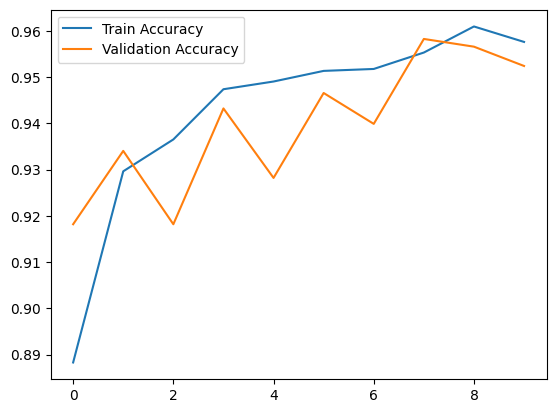

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()